In [12]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Priyanka\Desktop\Copy of Telco_customer_churn.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display dataset information
print(data.info())

# Check for missing values
print(data.isnull().sum())


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [13]:
print(data.describe())  #to see the data at a glance

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.00

In [14]:
pip install matplotlib seaborn pandas


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


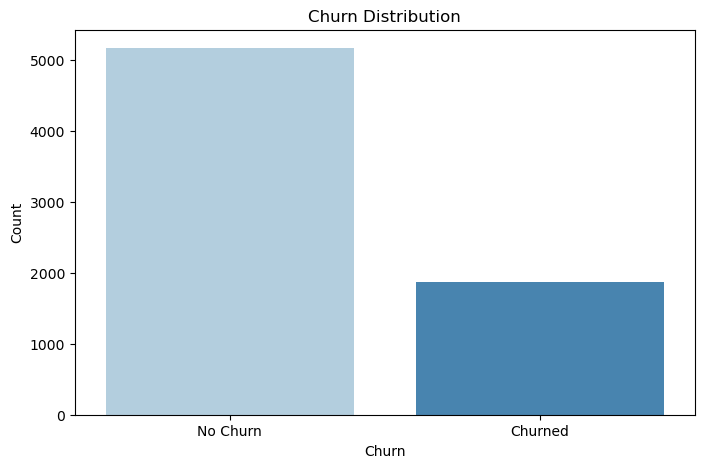

In [15]:
# Churn Distribution To visualize by plotting a bar graph how many customers churned versus those who did not.
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Churn Value', palette='Blues')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churned'])
plt.show()


C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


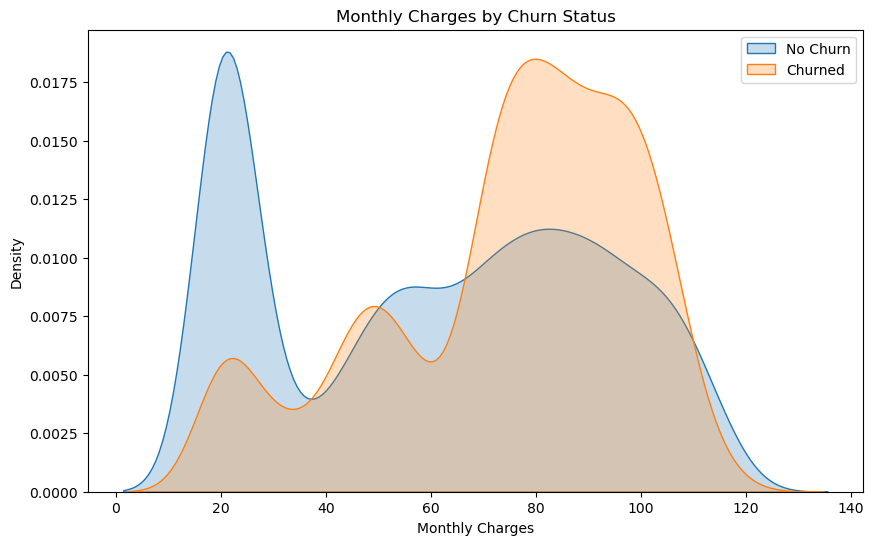

In [16]:
# Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Churn Value'] == 0]['Monthly Charges'], label='No Churn', fill=True)
sns.kdeplot(data[data['Churn Value'] == 1]['Monthly Charges'], label='Churned', fill=True)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


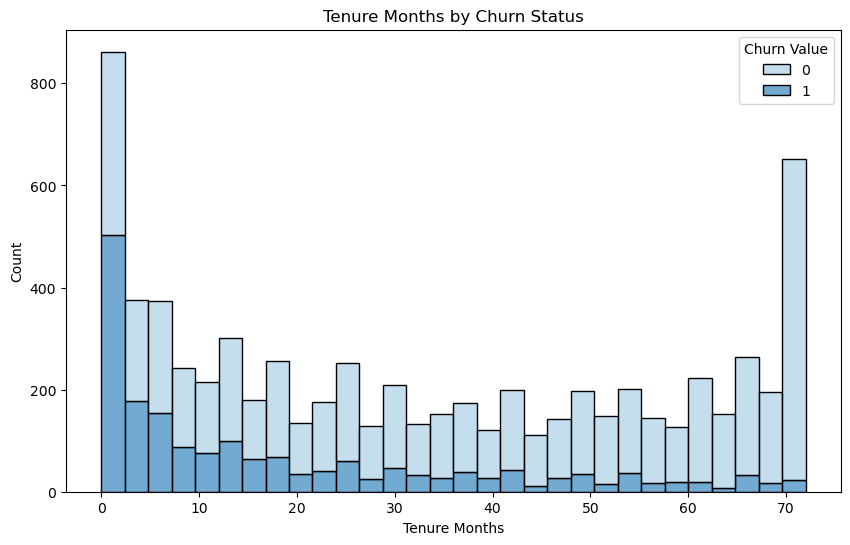

In [17]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure Months', hue='Churn Value', multiple='stack', bins=30, palette='Blues', alpha=0.7)
plt.title('Tenure Months by Churn Status')
plt.xlabel('Tenure Months')
plt.ylabel('Count')
plt.show()


In [19]:
# Check data types of each column
print(data.dtypes)

# check for the non-numeric columns 
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object
Non-numeric columns: Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gend

In [20]:
# converting binary categorical columns
data['Senior Citizen'] = data['Senior Citizen'].map({0: 0, 1: 1})  
data['Churn Label'] = data['Churn Label'].map({'No': 0, 'Yes': 1})  

# Convert 'Total Charges' if it's a string 
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')  # Convert to numeric

# Verify the conversion
print(data[['Total Charges', 'Churn Label']].dtypes)


Total Charges    float64
Churn Label        int64
dtype: object


In [21]:
# Keep only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Check the numeric DataFrame
print(data_numeric.head())


   Count  Zip Code   Latitude   Longitude  Senior Citizen  Tenure Months  \
0      1     90003  33.964131 -118.272783             NaN              2   
1      1     90005  34.059281 -118.307420             NaN              2   
2      1     90006  34.048013 -118.293953             NaN              8   
3      1     90010  34.062125 -118.315709             NaN             28   
4      1     90015  34.039224 -118.266293             NaN             49   

   Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Score  CLTV  
0            53.85         108.15            1            1           86  3239  
1            70.70         151.65            1            1           67  2701  
2            99.65         820.50            1            1           86  5372  
3           104.80        3046.05            1            1           84  5003  
4           103.70        5036.30            1            1           89  5340  


C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


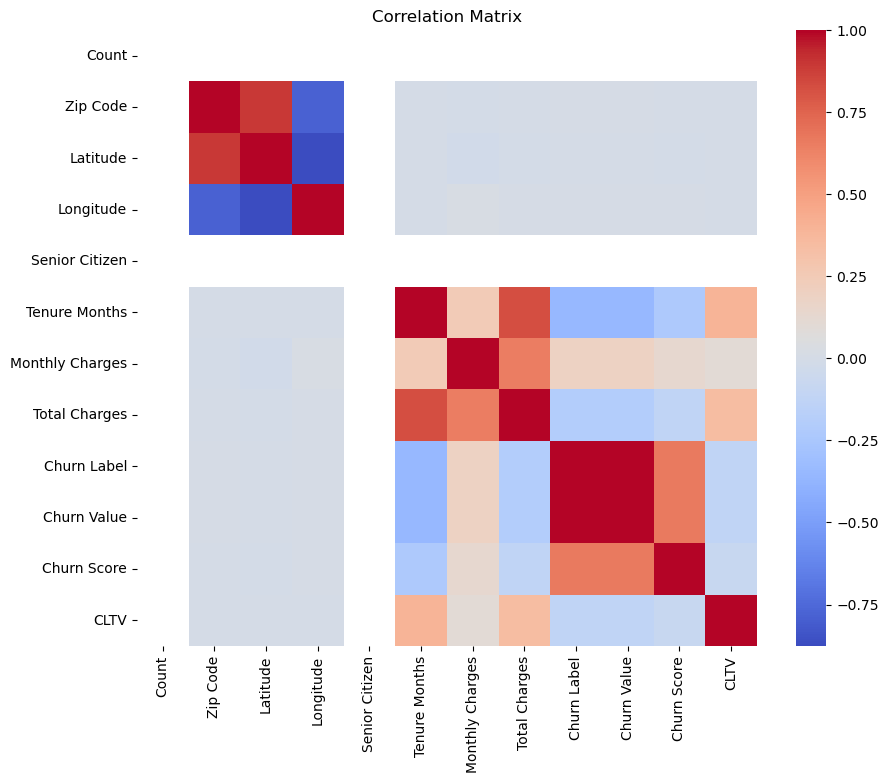

In [22]:
# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
